<a href="https://colab.research.google.com/github/Anish-2912/Diabetes-Prediction-Model/blob/main/Diabates_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import data
diabetes = pd.read_csv(r'/content/diabetes.csv')
print(diabetes.shape)
diabetes.head(5)
# Feature information
diabetes.info()
diabetes.describe()


(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-4-8c135a61acd8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_count.index, y=outcome_count.values, palette="viridis")


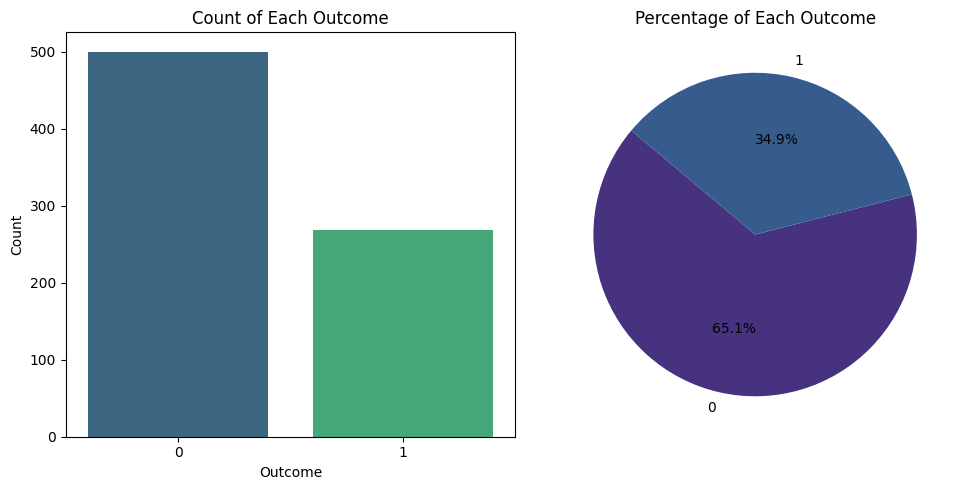

(Outcome
 0    500
 1    268
 Name: count, dtype: int64,
 Outcome
 0    65.104167
 1    34.895833
 Name: proportion, dtype: float64)

In [ ]:
# Count and percentage of each outcome
outcome_count = diabetes['Outcome'].value_counts()
outcome_percentage = diabetes['Outcome'].value_counts(normalize=True) * 100

# Plotting the count and percentage
plt.figure(figsize=(10, 5))

# Bar plot for count
plt.subplot(1, 2, 1)
sns.barplot(x=outcome_count.index, y=outcome_count.values, palette="viridis")
plt.title('Count of Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Pie chart for percentage
plt.subplot(1, 2, 2)
plt.pie(outcome_percentage, labels=outcome_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"), startangle=140)
plt.title('Percentage of Each Outcome')

plt.tight_layout()
plt.show()

# Displaying count and percentage
outcome_count, outcome_percentage

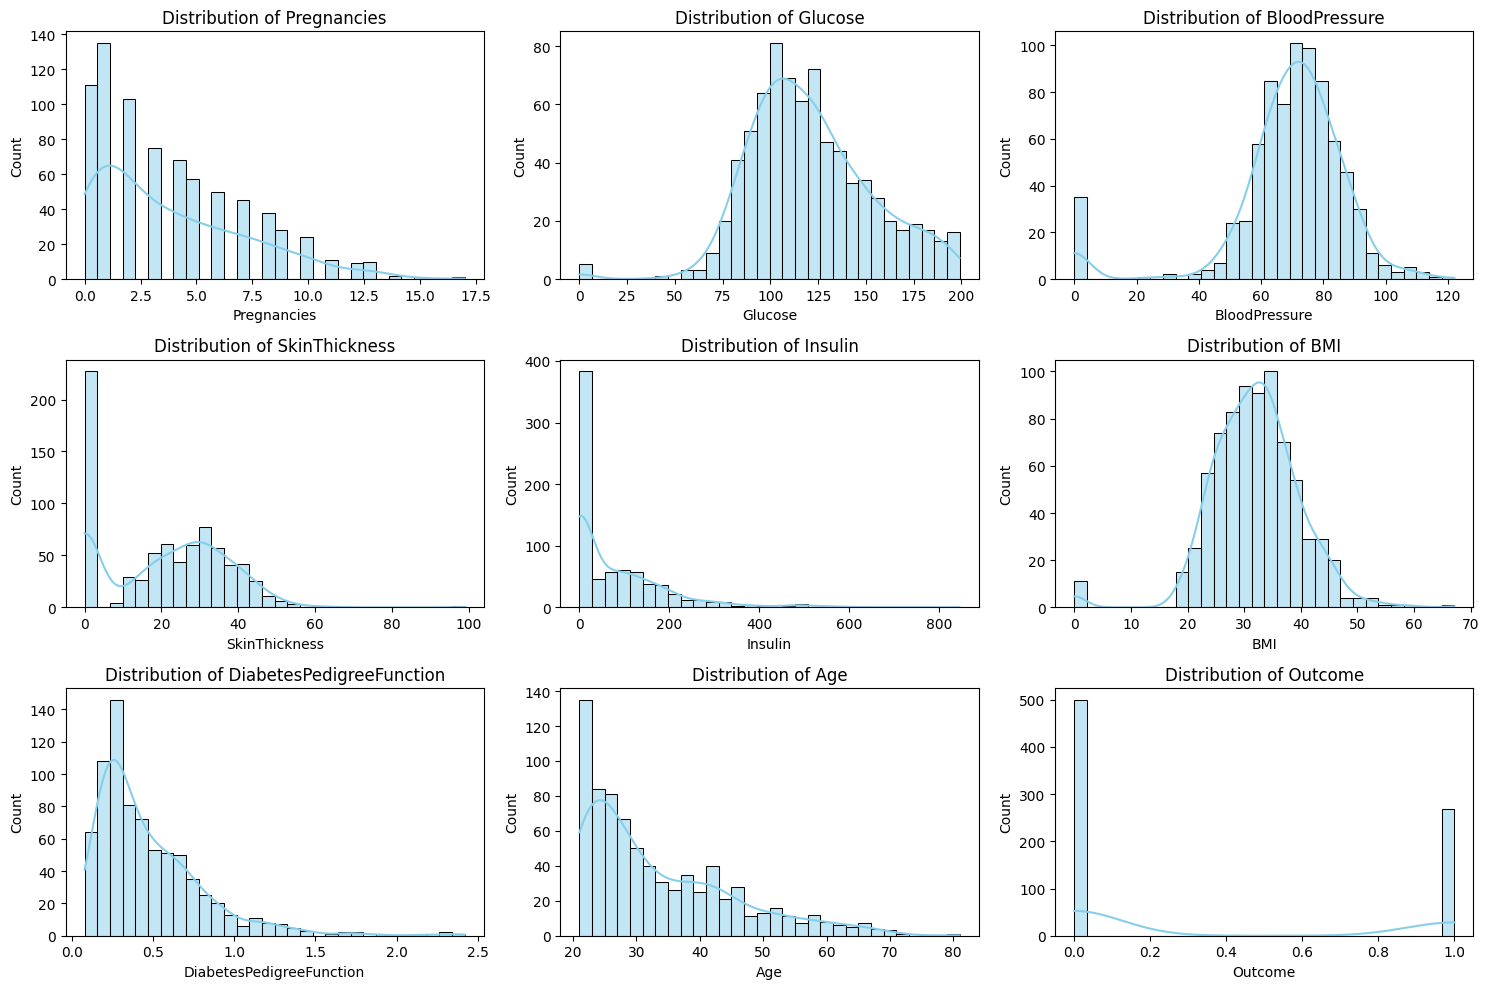

In [ ]:
# Plotting the distribution of each numerical feature in the dataset
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset and create a histogram
for i, column in enumerate(diabetes.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

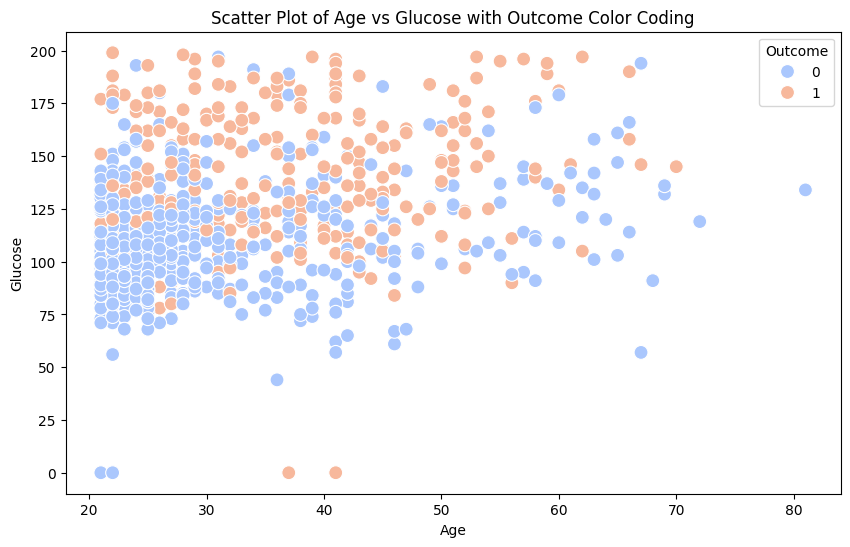

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes, x='Age', y='Glucose', hue='Outcome', palette='coolwarm', s=100)

# Adding labels and title
plt.title('Scatter Plot of Age vs Glucose with Outcome Color Coding')
plt.xlabel('Age')
plt.ylabel('Glucose')

# Show plot
plt.show()

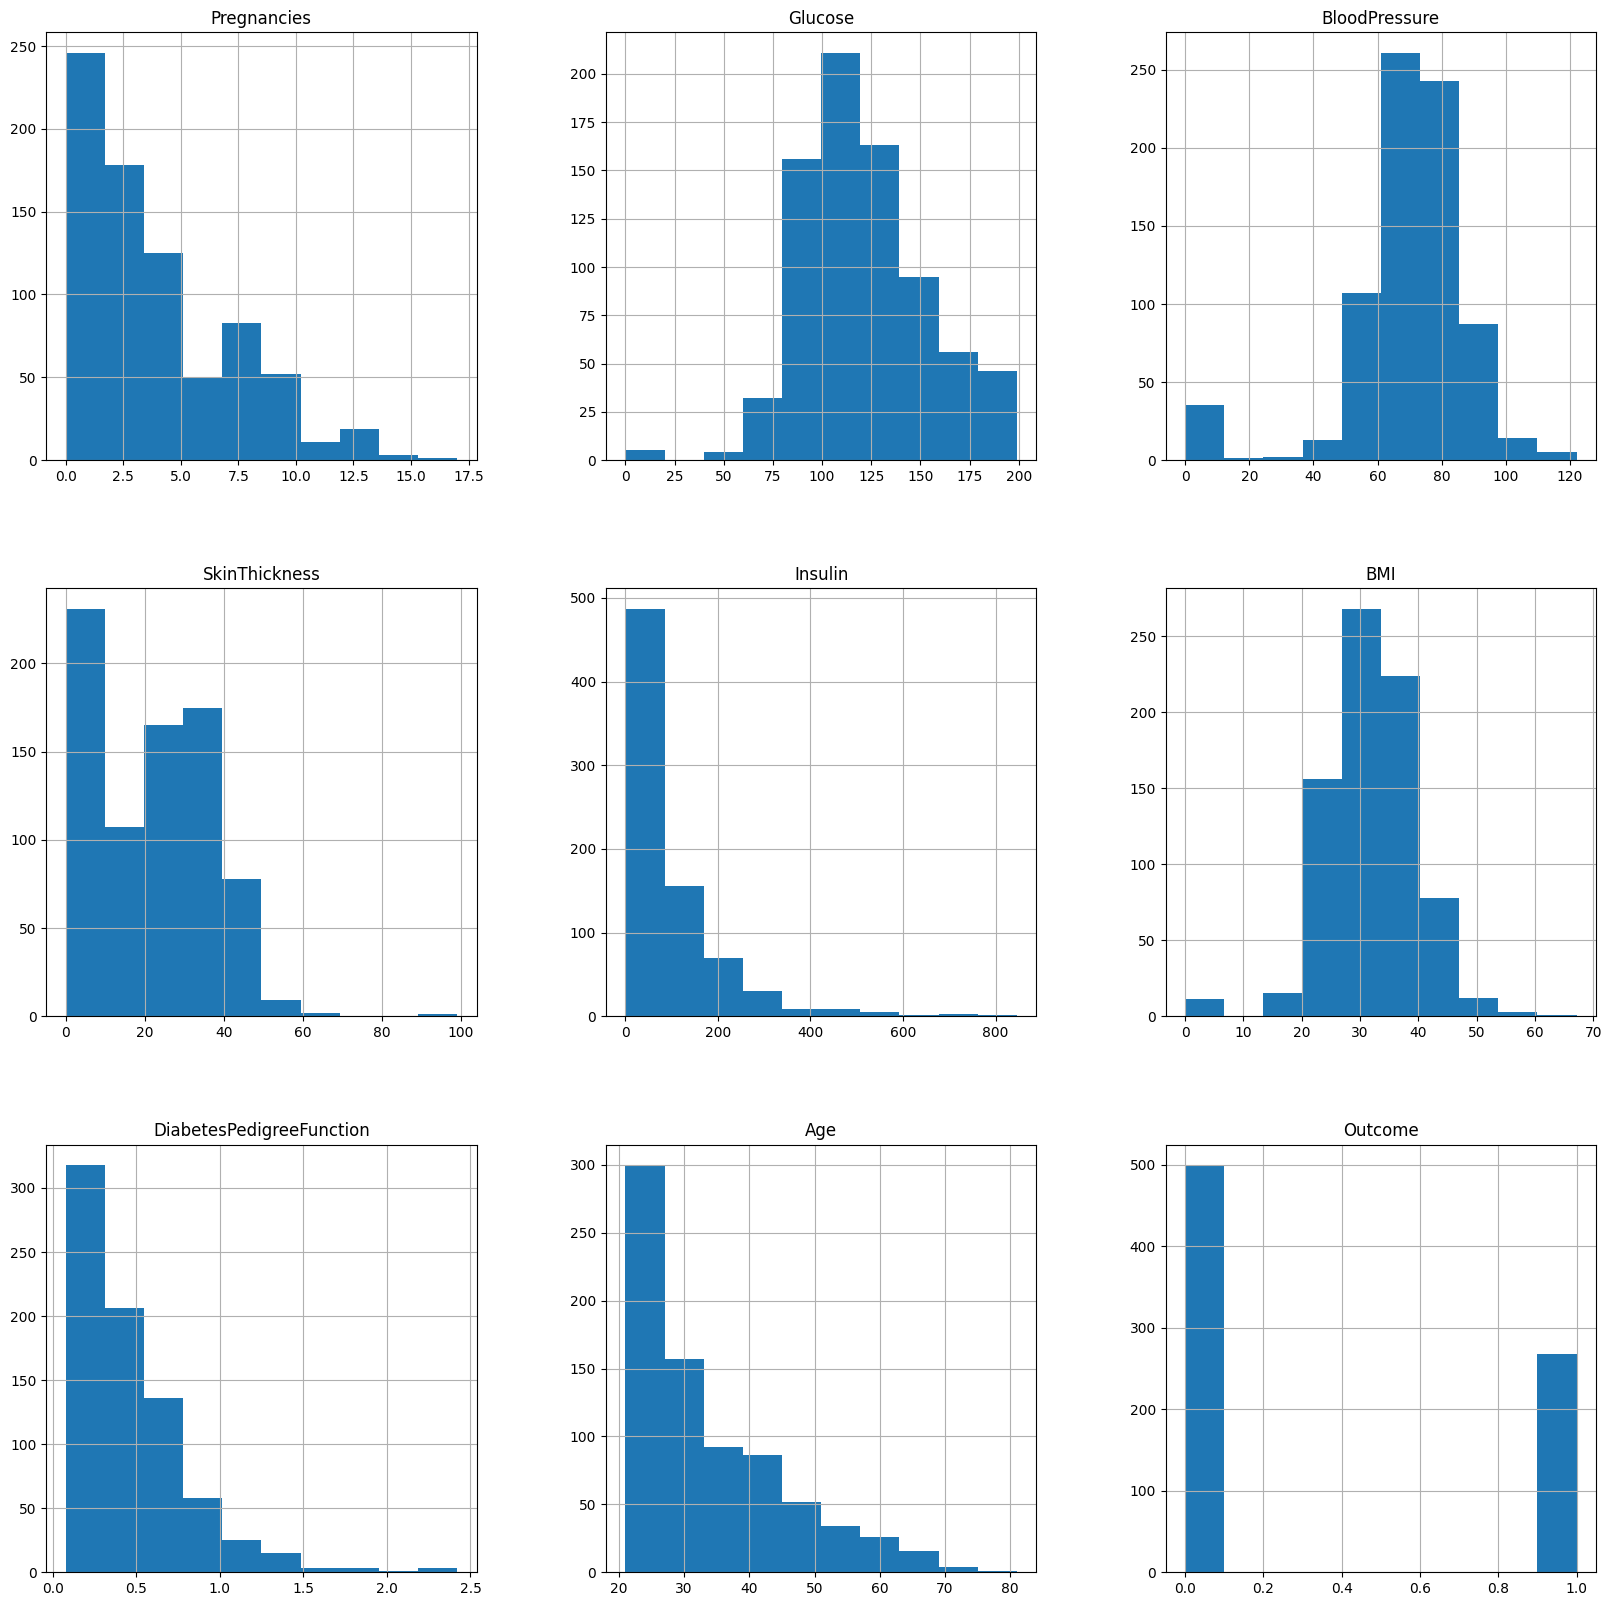

Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
# Let's examine the distribution of the 'target' variable
diabetes['Outcome'].value_counts()*100 / len(diabetes)
# Data Visualization
diabetes.hist(figsize = (20,20))
plt.show()
# Let’s check how well our outcome column is balanced
print(diabetes.Outcome.value_counts())




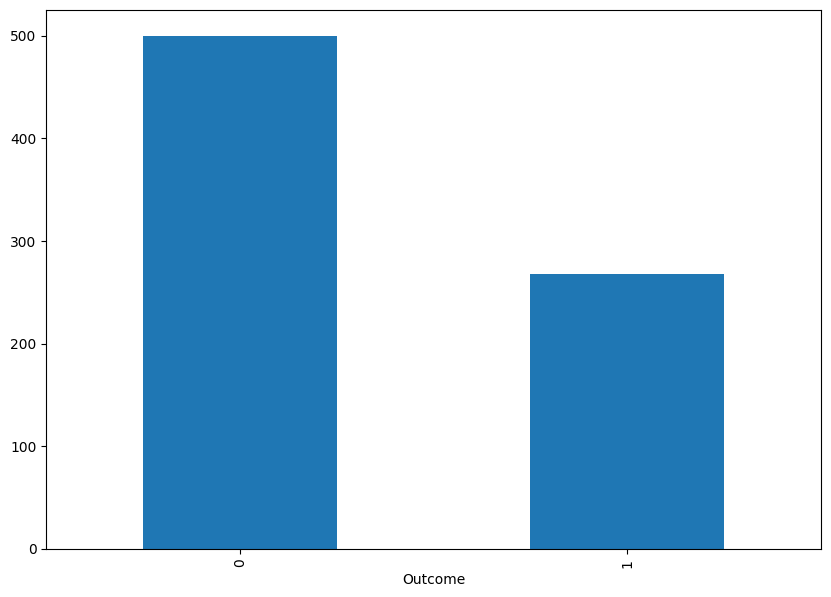

In [ ]:
plt.figure(figsize=(10,7))
diabetes.Outcome.value_counts().plot(kind="bar")
plt.show()


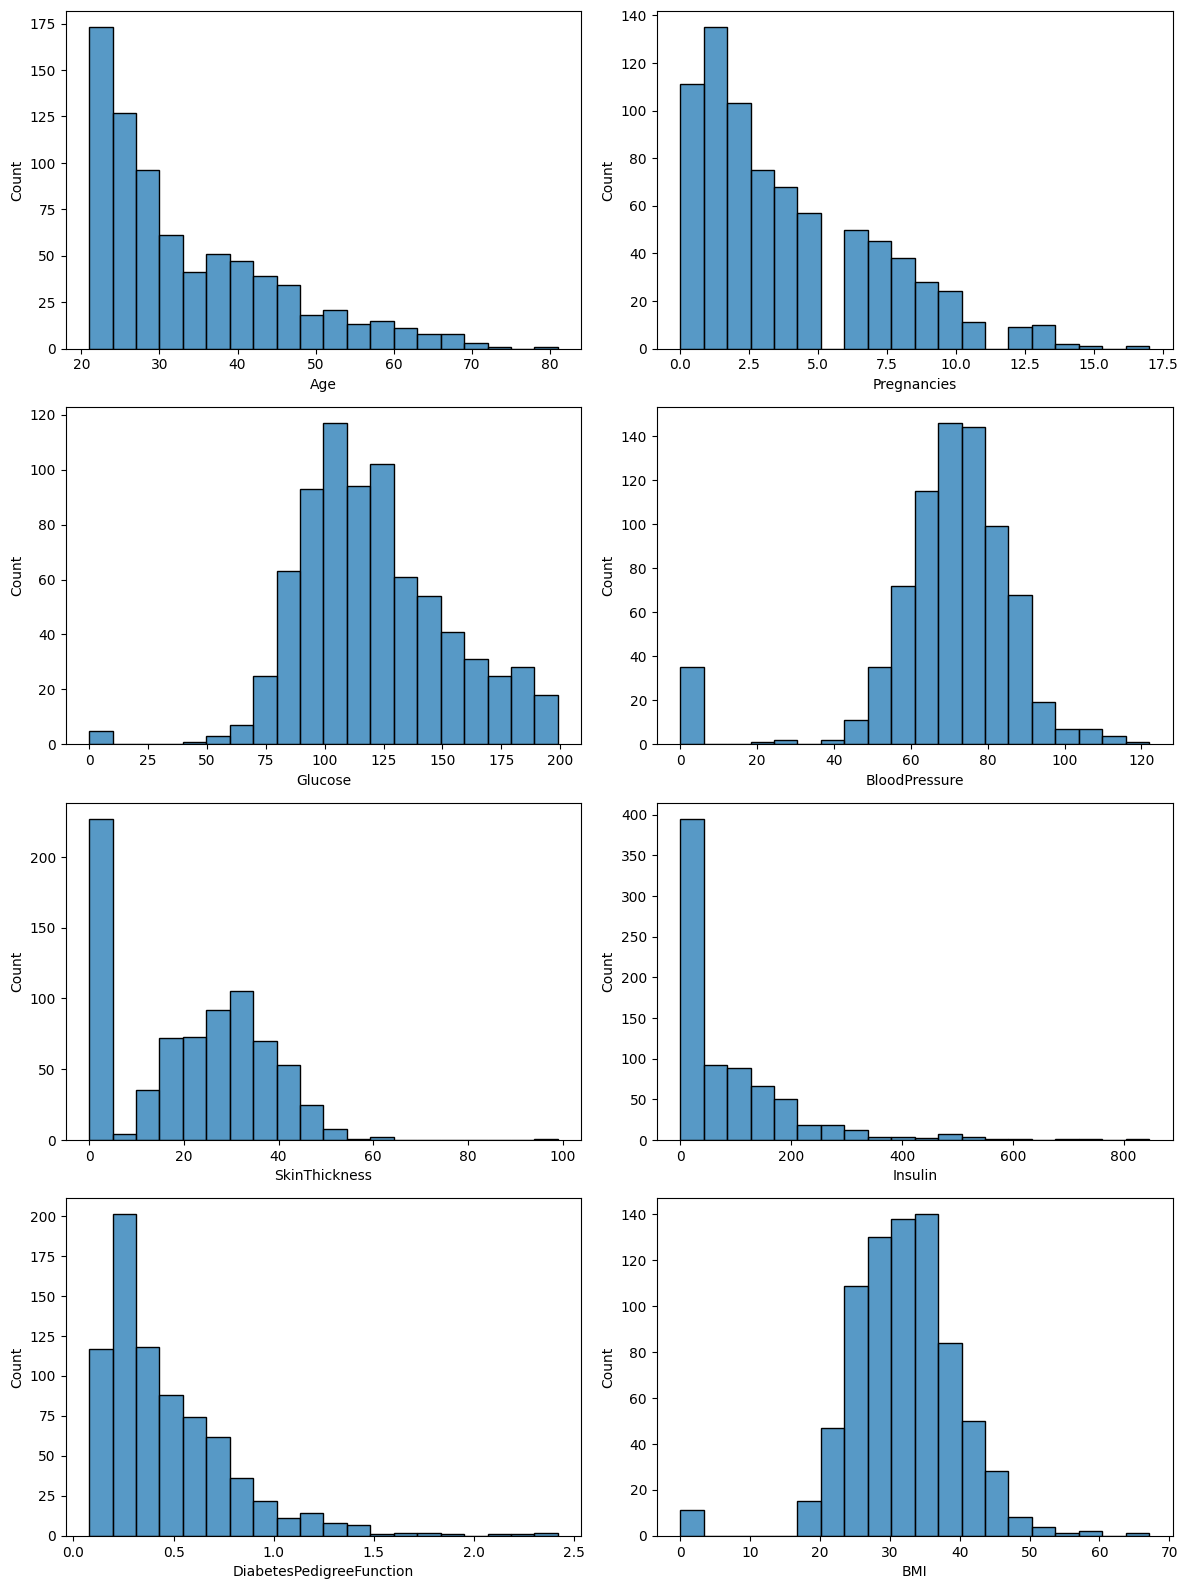

Pregnancies Mean by Outcome:
          Pregnancies
Outcome             
0           3.298000
1           4.865672

Age Mean by Outcome:
                Age
Outcome           
0        31.190000
1        37.067164

Insulin Mean by Outcome:
             Insulin
Outcome            
0         68.792000
1        100.335821

Glucose Mean by Outcome:
             Glucose
Outcome            
0        109.980000
1        141.257463

BMI Mean by Outcome:
                BMI
Outcome           
0        30.304200
1        35.142537


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define the grid of subplots (4 rows, 2 columns)
fig, ax = plt.subplots(4, 2, figsize=(12, 16))

# Plot distributions
sns.histplot(diabetes.Age, bins=20, ax=ax[0, 0])
sns.histplot(diabetes.Pregnancies, bins=20, ax=ax[0, 1])
sns.histplot(diabetes.Glucose, bins=20, ax=ax[1, 0])
sns.histplot(diabetes.BloodPressure, bins=20, ax=ax[1, 1])
sns.histplot(diabetes.SkinThickness, bins=20, ax=ax[2, 0])
sns.histplot(diabetes.Insulin, bins=20, ax=ax[2, 1])
sns.histplot(diabetes.DiabetesPedigreeFunction, bins=20, ax=ax[3, 0])
sns.histplot(diabetes.BMI, bins=20, ax=ax[3, 1])

plt.tight_layout()
plt.show()

# Aggregating the mean values by Outcome
preg_mean = diabetes.groupby("Outcome").agg({"Pregnancies": "mean"})
age_mean = diabetes.groupby("Outcome").agg({"Age": "mean"})
insulin_mean = diabetes.groupby("Outcome").agg({"Insulin": "mean"})
glucose_mean = diabetes.groupby("Outcome").agg({"Glucose": "mean"})
bmi_mean = diabetes.groupby("Outcome").agg({"BMI": "mean"})

# Display the means
print("Pregnancies Mean by Outcome:\n", preg_mean)
print("\nAge Mean by Outcome:\n", age_mean)
print("\nInsulin Mean by Outcome:\n", insulin_mean)
print("\nGlucose Mean by Outcome:\n", glucose_mean)
print("\nBMI Mean by Outcome:\n", bmi_mean)


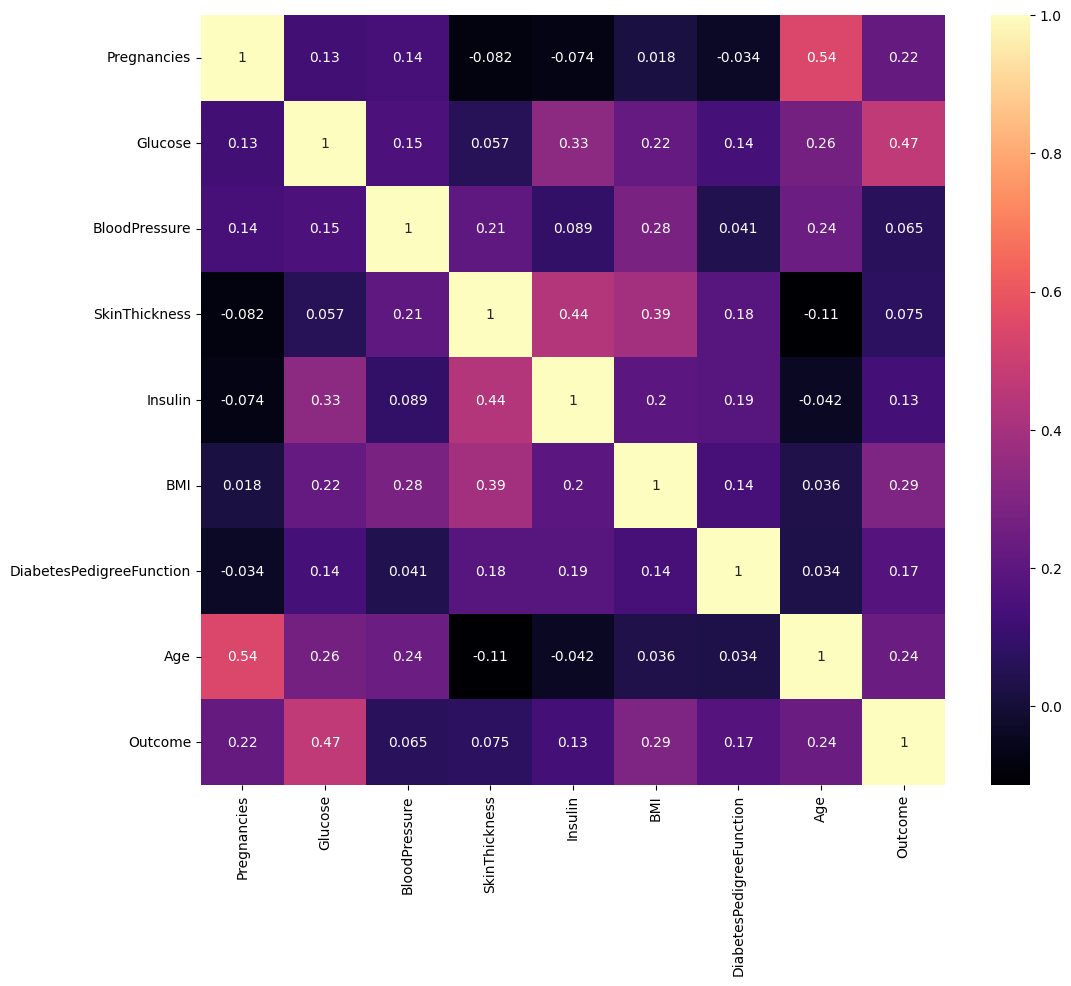

In [ ]:
# If (correlation > 0) -> positive correlation
# If (Correlation = 0) -> no correlation
# If (Correlation < 0) -> negative correlation
diabetes.corr()
plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(), annot=True, cmap = "magma")
plt.show()


In [ ]:
diabetes.head(5)
# Some features contain 0, which doesn't make sense in a few columns
# Clearly, 0 indicates missing value so we replace 0 by NaN
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
diabetes.head(5)
# Let's now check where our dataset has null values
diabetes.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# The missing values will be filled with the median values of each variable
diabetes['Glucose'] = diabetes['Glucose'].fillna(diabetes['Glucose'].median())
diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].median())
diabetes['SkinThickness'] = diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median())
diabetes['Insulin'] = diabetes['Insulin'].fillna(diabetes['Insulin'].median())
diabetes['BMI'] = diabetes['BMI'].fillna(diabetes['BMI'].median())
# Let's check if our dataset has any more null values now
diabetes.isnull().sum()
diabetes.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# According to BMI, some ranges can be determined and categorical variables can then be assigned
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity-I", "Obesity-II", "Obesity-III"], dtype = "category")
diabetes["NewBMI"] = NewBMI

diabetes.loc[diabetes["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes.loc[(diabetes["BMI"] > 18.5) & (diabetes["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes.loc[(diabetes["BMI"] > 24.9) & (diabetes["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes.loc[(diabetes["BMI"] > 29.9) & (diabetes["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes.loc[(diabetes["BMI"] > 34.9) & (diabetes["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes.loc[diabetes["BMI"] > 39.9 , "NewBMI"] = NewBMI[5]
diabetes.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity-I
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity-III


In [ ]:
# According to Glucose value, some ranges can be determined and categorical variables can then be assigned
NewGlucose = pd.Series(["Normal", "Prediabetes", "High"], dtype = "category")
diabetes["NewGlucose"] = NewGlucose

diabetes.loc[diabetes["Glucose"] < 140, "NewGlucose"] = NewGlucose[0]
diabetes.loc[(diabetes["Glucose"] >= 140) & (diabetes["Glucose"] <= 199), "NewGlucose"] = NewGlucose[1]
diabetes.loc[diabetes["Glucose"] > 199 ,"NewGlucose"] = NewGlucose[2]
diabetes.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewGlucose
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity-I,Prediabetes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Prediabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity-III,Normal


In [ ]:
# According to Insulin value, some ranges can be determined and categorical variables can then be assigned
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

diabetes = diabetes.assign(NewInsulin = diabetes.apply(set_insulin, axis=1))
diabetes.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewGlucose,NewInsulin
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity-I,Prediabetes,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Prediabetes,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity-III,Normal,Abnormal


In [ ]:
#Building our model
# Define the 'features' and 'labels'
X = diabetes.drop('Outcome', axis='columns')
y = diabetes['Outcome']



In [ ]:
# Define train : test dataset in 80 : 20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Example using pd.get_dummies() for One-Hot Encoding on both train and test datasets
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns to ensure both datasets have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=2000)

# Train the model on the training set
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

In [ ]:
# evaluating our RFC model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 12]
 [22 33]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy Score(in %): ", (accuracy_score(y_test, y_pred))*100)

Accuracy Score(in %):  77.92207792207793


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Train the model on the training set
log_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = log_model.predict(X_test)


Recall: 0.60


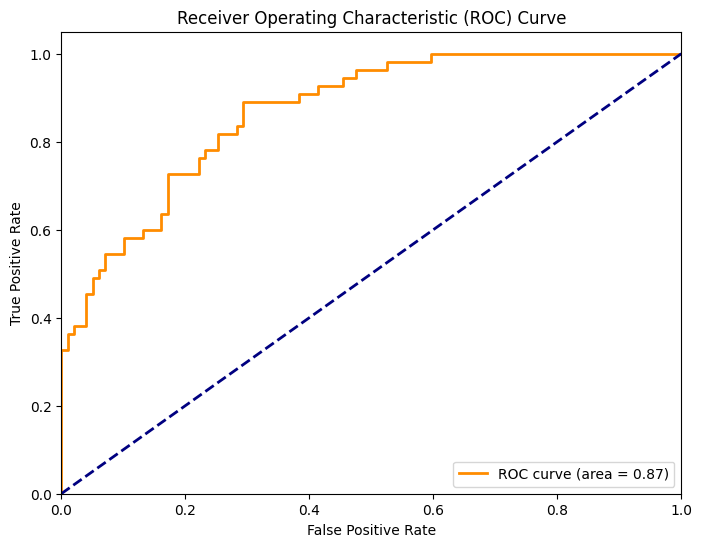

In [ ]:
from sklearn.metrics import roc_curve, auc, recall_score

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# ROC curve and AUC
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# evaluating our SVC model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[86 13]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy Score(in %): ", (accuracy_score(y_test, y_pred1))*100)

Accuracy Score(in %):  76.62337662337663


In [ ]:
# get importance
importance = rfc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07394
Feature: 1, Score: 0.19747
Feature: 2, Score: 0.07752
Feature: 3, Score: 0.06470
Feature: 4, Score: 0.07509
Feature: 5, Score: 0.13875
Feature: 6, Score: 0.11267
Feature: 7, Score: 0.11288
Feature: 8, Score: 0.01340
Feature: 9, Score: 0.01188
Feature: 10, Score: 0.01003
Feature: 11, Score: 0.01252
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.04445
Feature: 14, Score: 0.04479
Feature: 15, Score: 0.00987


# Plot feature importance
plt.figure(figsize=(16,11))
pd.Series(importance, index=X.columns).plot(kind='barh')
plt.show()

In [ ]:
import pickle

# First, we will use the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then, we will load that saved model
rfc_from_pickle = pickle.loads(saved_model)

# Finally, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewGlucose,NewInsulin
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity-I,Prediabetes,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Prediabetes,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity-III,Normal,Abnormal


In [ ]:
print(X_train.shape)  # Should output (n_samples, 17) if the model expects 17 features


(614, 16)


In [ ]:
input_data = [[6, 60.0, 72.0, 35.0, 125.0, 33.6, 0.627, 100, 1, 0, 1, 1, 0, 0, 0, 0]]

prediction = rfc.predict(input_data)
print("Prediction:", prediction)


Prediction: [1]
